# HW notMNIST

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from glob import glob
%config InlineBackend.figure_format = 'svg'

def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',
                  img_shape=(28,28),test_size=0.25,one_hot=False):
    # download data if it's missing. If you have any problems, go to the urls and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system('curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system('tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0
    
    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters: 
            continue
        try:
            data.append(resize(imread(img_path), img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]" % img_path)
        
    data = np.stack(data)[:,None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))
    
    if one_hot:
        labels = (np.arange(np.max(labels) + 1)[None,:] == labels[:, None]).astype('float32')
    
    #split into train/test
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, stratify=labels)
    
    print("Done")
    return X_train, y_train, X_test, y_test

## Task description

In this notebook you are suggested to train several models of machine learning on the notMNIST dataset. To get full points per each model it must beat the **baseline** on test dataset. Models to test:

* logistic regression, 86% (**1 point**)
* k-nearest neigbors, 88% (**1 point**)
* naive Bayes classifier, 80% (**1 point**)
* decision tree, 82% (**1 point**)
* random forest, 91% (**1 point**)
* MLP, 91% (**1.5 points**)
* CNN, 92% (**2 points**)
* overall comparison of models, including some graphs (e.g, bar plot) (**1 point**)

**Bonus**! Each percent above baseline will bring you **0.1 points**.

### Important notes

* The total time of execution of all cells must not exceed $10$ minutes
* Broken code in a section automatically implies $0$ points for this section
* Do not erase any existing cells
* Use magic cell %%time to measure the time of execution of heavy-computation cells
* For each model use the followind structure:
    1. Import and build model

    2. Fit model on train dataset

    3. Measure and print train and test accuracy

    4. Make predictions on test dataset

    5. Plot confusion matrix

    6. Plot 16 random samples from the test dataset with true labels and predicted classes

### Submission

* Name your submission in the format `DAY_NAME_SURNAME.ipynb`
* Send this jupyter file to `???.gmail.com` (**will be specified later**) providing topic `DAY_NAME_SURNAME_notMNIST`
* **Deadline:** 19.11.2023 23:59 (GMT+6)

## Load `notmnist` dataset

In [3]:
%%time
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
CPU times: total: 5.23 s
Wall time: 5.25 s


Size of train and test datasets:

In [4]:
X_train.shape, X_test.shape

((14043, 784), (4681, 784))

Verify that the classes are balanced:

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1404, 1404, 1405, 1405, 1405, 1404, 1404, 1404, 1404, 1404],
       dtype=int64))

## Visualize some data

In [6]:
def plot_letters(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = chr(ord("A") + y_true[indices[i]])
        else:
            title = f"y={chr(ord('A') + y_true[indices[i]])}, ŷ={chr(ord('A') + y_pred[indices[i]])}"
        plt.title(title, size=20)
    plt.show()

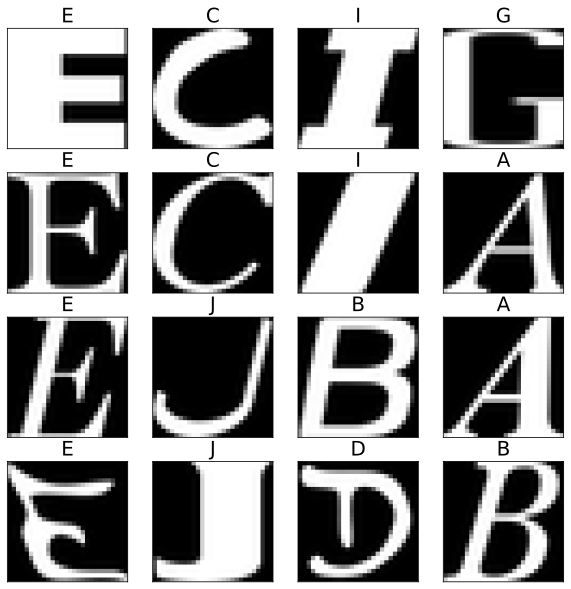

In [7]:
plot_letters(X_train, y_train, random_state=912)

## Logistic regression

In [8]:
%%time
from sklearn.linear_model import LogisticRegression

X_train, y_train, X_test, y_test = load_notmnist()

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1) 

logreg = LogisticRegression(max_iter = 700, C = 0.01, penalty = 'l2')

logreg.fit(X_train_flatten, y_train)

y_pred = logreg.predict(X_test_flatten)

accuracy_logreg = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy_logreg}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
Accuracy: 89.0408032471694
Confusion Matrix:
 [[423   3   2   3   4   1   3  10  12   7]
 [  2 411   4  17   6   8   5   4   5   7]
 [  1   3 427   2  16   2  13   1   3   0]
 [  3  10   1 428   5   3   7   1   8   2]
 [  2  13  20   0 401   6   5   5  13   3]
 [  2   1   3   1   4 431   4   3  13   6]
 [  6  13  13   4   6   8 408   4   4   2]
 [ 12   8   5   5   3   5   3 410  13   4]
 [  7   3   3   7  12   5   5   5 403  18]
 [  1   4   1   2   4   8   2   4  16 426]]
CPU times: total: 28.1 s
Wall time: 9.13 s


## kNN

In [9]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

X_train, y_train, X_test, y_test = load_notmnist()

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)


X_train, X_val, y_train, y_val = train_test_split(X_train_flatten, y_train, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_flatten)

classifier = KNeighborsClassifier(n_neighbors=9, weights = 'distance', metric = 'cosine')
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_val_scaled)



print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

accuracy_knn = accuracy_score(y_val, y_pred) * 100
print(f'Validation Accuracy: {accuracy_knn}')

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
[[179   3   3   1   1   2   0  13   2   6]
 [  1 188   2   9   4   3   0   0   4   2]
 [  1   0 189   1   1   1   3   0   1   1]
 [  1   4   3 176   0   0   1   1   4   1]
 [  2   2  18   1 183   7   4   0   5   1]
 [  2   0   4   0   6 193   2   0   1   4]
 [  1   4  20   2   5   2 189   3   4   5]
 [  5   1   0   2   1   1   1 184   6   2]
 [  2   0   0   1   1   2   1   0 209   9]
 [  0   1   2   1   1   0   1   0   6 185]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       210
           1       0.93      0.88      0.90       213
           2       0.78      0.95      0.86       198
           3       0.91      0.92      0.91       191
           4       0.90      0.82      0.86     

## Naive Bayes

In [10]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

X_train, y_train, X_test, y_test = load_notmnist()

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

X_train, X_val, y_train, y_val = train_test_split(X_train_flatten, y_train, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_flatten)

bayes = GaussianNB()
bayes.fit(X_train_scaled, y_train)

y_val_pred = bayes.predict(X_val_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

accuracy_bayes = accuracy_score(y_val, y_val_pred) * 100
print(f'Validation Accuracy: {accuracy_bayes}')

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
Confusion Matrix:
 [[294   8   1   1   3   0  11  27  26  26]
 [ 15 350   0   5   9   5   6  14  27  15]
 [  4   8 355   7  15  11   6   2  14   2]
 [ 11  10   0 324   0   7   5   9  19  11]
 [  7  10  10   0 322  11  14   2  36  10]
 [  5   1   0   3   1 362   1   3  24  13]
 [  7  14  18   0   5  10 333   5  22   5]
 [ 20  10   0   3   9   5   3 339  19  10]
 [  9   1   0   5   6   7   1   4 294  89]
 [  4   4   0   1   1   7   4   3  31 407]]
Validation Accuracy: 80.22786612864941
CPU times: total: 5.75 s
Wall time: 5.77 s



## Decision tree


In [11]:
%%time
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import imread
from skimage.transform import resize
from glob import glob

X_train, y_train, X_test, y_test = load_notmnist()


X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

X_train, X_val, y_train, y_val = train_test_split(X_train_flatten, y_train, test_size=0.1, random_state=42)

tree_classifier = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10, random_state=42)
tree_classifier.fit(X_train, y_train)

y_val_pred = tree_classifier.predict(X_val)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy}')

y_test_pred = tree_classifier.predict(X_test_flatten)

print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
accuracy_tree = accuracy_score(y_test, y_test_pred) * 100
print(f'Test Accuracy: {accuracy_tree}') 

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
Confusion Matrix:
 [[138   2   0   1   3   6   1   5   1   3]
 [  1 104   2   6   5   3   2   3   3   1]
 [  0   1 144   3   4   1   8   0   1   2]
 [  3   4   3 102   2   2   3   6   2   4]
 [  1   5   7   2  99   8   6   2   1   2]
 [  0   3   0   2   3 106   2   0   2   5]
 [  2   5   8   7   4   1  96   1   1   1]
 [  2   7   0   2   2   2   2 131   5   4]
 [  2   1   1   2   1   2   0   2 135   4]
 [  1   2   2   6   2   2   2   2   6 106]]
Validation Accuracy: 0.8263345195729538
Confusion Matrix (Test Set):
 [[391   8   5   7   6  11   6  21   4   9]
 [  7 381   9  22  19   3  13   8   5   1]
 [  1   7 386   5  14   5  28   6   8   8]
 [  2  17   5 405   5   5   9   6   5  10]
 [  4  15  12   7 382  12   9   5  15   7]
 [  6   4   4  

## Random Forest

In [12]:
%%time
from sklearn.ensemble import RandomForestClassifier
from glob import glob
from matplotlib.pyplot import imread
from skimage.transform import resize


X_train, y_train, X_test, y_test = load_notmnist()

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

X_train, X_val, y_train, y_val = train_test_split(X_train_flatten, y_train, test_size=0.25, random_state=42)

random_forest = RandomForestClassifier(n_jobs=-1, n_estimators=700, min_samples_split=7,min_samples_leaf=2, 
                                                  max_features = 'sqrt', bootstrap = False)
random_forest.fit(X_train, y_train)

y_val_pred = random_forest.predict(X_val)

print("Confusion Matrix (Validation Set):\n", confusion_matrix(y_val, y_val_pred))
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val}')

y_test_pred = random_forest.predict(X_test_flatten)

print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
accuracy_forest = accuracy_score(y_test, y_test_pred) * 100
print(f'Test Accuracy: {accuracy_forest}')

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
Confusion Matrix (Validation Set):
 [[325   2   0   3   2   1   4   5   3   1]
 [  6 322   2  11   1   2   4   3   2   0]
 [  1   2 331   0   5   6  14   1   2   1]
 [  3  17   1 327   1   3   2   2   0   7]
 [  1   6  13   0 303  13  11   1   2   0]
 [  1   0   1   2   3 360   1   2   1   5]
 [  3   5   3   6   2   8 304   1   1   4]
 [ 11   5   0   1   4   4   4 319   3   1]
 [  2   2   1   2   9   1   3   1 290   9]
 [  1   2   0   1   1   4   4   1   1 336]]
Validation Accuracy: 0.9162631728852179
Confusion Matrix (Test Set):
 [[445   2   2   2   2   0   5   9   1   0]
 [  4 419   0  11   6   4  14   7   1   2]
 [  1   0 430   3   4   7  21   0   2   0]
 [  1  17   0 426   3   2   7   5   2   5]
 [  5   3   8   1 421  10  15   1   4   1


## MLP

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler



X_train, y_train, X_test, y_test = load_notmnist()

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flatten)
X_test_scaled = scaler.transform(X_test_flatten)

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.15, random_state=42)

mlp = MLPClassifier( hidden_layer_sizes=(1000,),  
    activation='relu',         
    alpha=0.0001,               
    max_iter=500,               
    learning_rate='constant',   
    random_state=42)
mlp.fit(X_train, y_train)


y_val_pred = mlp.predict(X_val)


print("Confusion Matrix (Validation Set):\n", confusion_matrix(y_val, y_val_pred))
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val}')

y_test_pred = mlp.predict(X_test_scaled)

print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
accuracy_mlp = accuracy_score(y_test, y_test_pred) *100
print(f'Test Accuracy: {accuracy_mlp}')

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


## CNN


Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done



Epoch 1/10


439/439 [==============================] - 3s 6ms/step - loss: 0.6828 - accuracy: 0.7899 - val_loss: 0.3811 - val_accuracy: 0.8855
Epoch 2/10
439/439 [==============================] - 2s 5ms/step - loss: 0.3403 - accuracy: 0.8950 - val_loss: 0.2985 - val_accuracy: 0.9086
Epoch 3/10
439/439 [==============================] - 2s 5ms/step - loss: 0.2673 - accuracy: 0.9169 - val_loss: 0.2597 - val_accuracy: 0.9210
Epoch 4/10
439/439 [==============================] - 2s 5ms/step - loss: 0.2205 - accuracy: 0.9259 - val_loss: 0.2671 - val_accuracy: 0.9242
Epoch 5/10
439/439 [==============================] - 2s 6ms/step - loss: 0.1880 - accuracy: 0.9383 - val_loss: 0.2603 - val_accuracy: 0.9222
Epoch 6/10
439/439 [==============

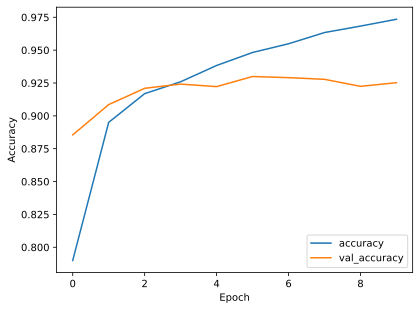

CPU times: total: 2min 19s
Wall time: 36.5 s


In [14]:
%%time
import tensorflow as tf
from tensorflow.keras import layers, models

X_train, y_train, X_test, y_test = load_notmnist()

cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

history = cnn.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

test_loss, accuracy_cnn = cnn.evaluate(X_test, y_test) 
accuracy_cnn = accuracy_cnn * 100
print( f'Test accuracy: {accuracy_cnn}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Plot results

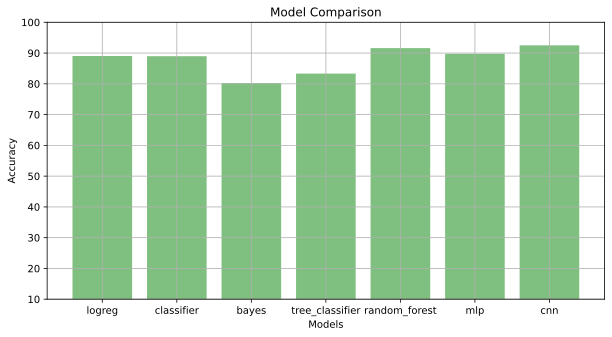

In [15]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['logreg', 'classifier', 'bayes', 'tree_classifier', 'random_forest', 'mlp', 'cnn']
accuracies = [accuracy_logreg, accuracy_knn, accuracy_bayes, accuracy_tree, accuracy_forest, accuracy_mlp, accuracy_cnn]


plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color='green', alpha=0.5)
plt.ylim(10, 100) 

plt.grid(True) 
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')


plt.show()

## Conclusion ##

 *As we can see in the graph, the best are neural networks(**MLP, CNN**) and **random forest** with an accuracy of more than 90 percent but at the same time they are complex and require more time and computing power, and lighter models such as **logistic regression** and **kNN** are relatively fast.* 

*The models that showed the worst results are **Naive Bayes** and **Desicion Tree**.*

*For more complex tasks I would use **CNN** and for small tasks **logistic regression** and **random forest***

<ol>
<li>CNN 92.4%</li>
<li>MLP 91.6%</li>
<li>Random Forest 91.4%</li>
<li>kNN 89.1%</li>
<li>Logistic Regression 88.9%</li>
<li>Decision Tree 82.9%</li>
<li>Naive Bayes 80.7%</li>
</ol>